# Install and import all necessary libraries

In [1]:
!pip install -r requirements.txt

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/25/92/ee1d7a00bb6b8c55755d4984fd82608603a3cc59959245068ce32e7fb808/scikit_learn-1.6.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached scikit_learn-1.6.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (31 kB)
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/0b/fa/f33a4148c6fb46ca2a3f8de39c24d473822d5774d652b66ed9b1214da5f7/torch-2.6.0-cp311-none-macosx_11_0_arm64.whl.metadata
  Using cached torch-2.6.0-cp311-none-macosx_11_0_arm64.whl.metadata (28 kB)
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/29/88/00c69db213ee2443ada8886ec60789b227e06bb869d85ee324578221a7f7/torchvision-0.21.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached torchvision-0.21.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.1 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/pack

In [3]:
import random
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt

from src.data_process import load_mnist_dataset, get_dataloader, prepare_custom_input, print_predictions
from src.classifiers import MnistClassifier

# Pipeline detailed example

## Dataset preparation

In [4]:
# transforms to pytorch tensors and normalize
img_transforms = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,)),
     ])

# create Dataset classes for train and test MNIST data
train_dataset, test_dataset = load_mnist_dataset(img_transforms)
print(f'Train dataset size: {len(train_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')

Train dataset size: 60000
Test dataset size: 10000


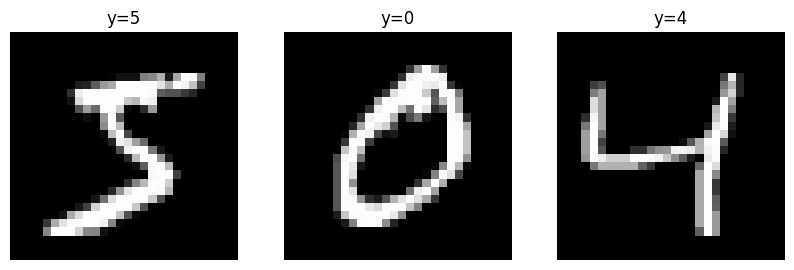

In [5]:
# Plot first 3 images from train dataset

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i in range(3):
    image, label = train_dataset[i]
    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(f"y={label}")
    axes[i].axis("off")

plt.show()

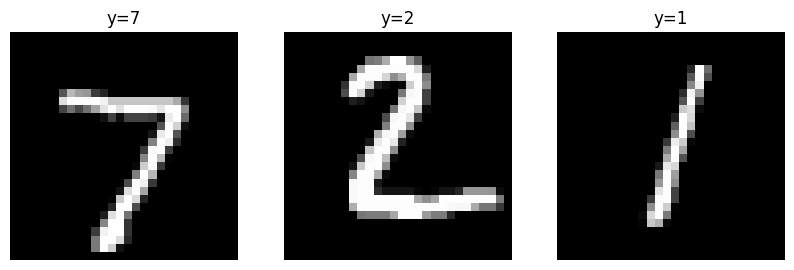

In [6]:
# Plot first 3 images from test dataset

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i in range(3):
    image, label = test_dataset[i]
    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(f"y={label}")
    axes[i].axis("off")

plt.show()

In [6]:
# Create dataloaders for train and test datasets

train_dataloader = get_dataloader(train_dataset, 64)
test_dataloader = get_dataloader(test_dataset, 64)

## Initialize, train and test classifier

Training CNN...
Epoch 1: loss = 0.3632939375821811
Epoch 2: loss = 0.10071015113126686
Epoch 3: loss = 0.0712715246653093
Epoch 4: loss = 0.05672266259903648
Epoch 5: loss = 0.04822364442650157
Epoch 6: loss = 0.04177291670552036
Epoch 7: loss = 0.036376809151019096
Epoch 8: loss = 0.032425159515231165
Epoch 9: loss = 0.02882767122249796
Epoch 10: loss = 0.025390971250504928
Training finished
Performing prediction on test set...
Accuracy 0.9899, macro f1 0.9897805141387417
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99  

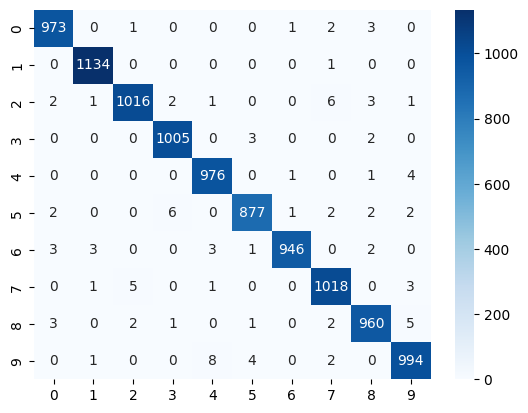

In [7]:
algorithm = 'cnn'  # Select an algorithm type from ['rf', 'nn', 'cnn']
classifier = MnistClassifier(algorithm)  # Create classifier

classifier.train(train_dataloader)  # Train the classifier
y_pred, y_test = classifier.test(test_dataloader)  # Evaluate performance on test dataset

In [8]:
# Get samples that were misclassified, calculate their rate in test data

misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_labels = y_pred[misclassified_indices]

misclassified_percent = len(misclassified_indices) / len(test_dataset) * 100
print(f'Percent of misclassified samples: {misclassified_percent:.2f}%')

Percent of misclassified samples: 1.01%


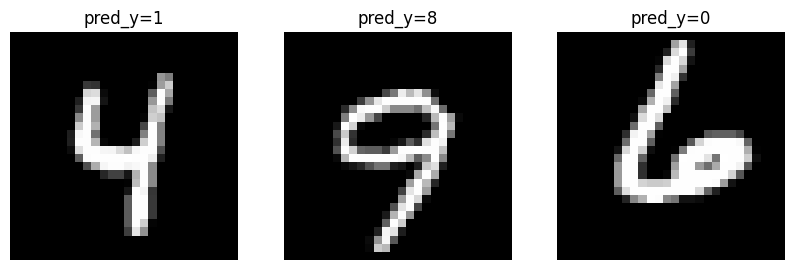

In [9]:
# Plot 3 random misclassified samples

random_misclassified = random.choices(misclassified_indices, k=3)
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i, index in enumerate(random_misclassified):
    image, label = test_dataset[index]
    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(f"pred_y={misclassified_labels[i]}")
    axes[i].axis("off")

plt.show()

## Custom input prediction

In [10]:
# Simulate custom user input by getting data from folder (also can be performed for one image)

path_to_input = 'sample_custom_data'
image_paths, prepared_data = prepare_custom_input(path_to_input)

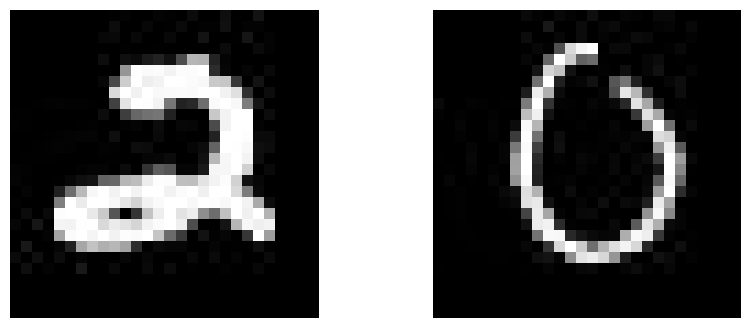

In [11]:
# Sample folder consists of only 2 images, plot them

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for i in range(2):
    image = prepared_data[i]
    axes[i].imshow(image.numpy()[0], cmap="gray")
    axes[i].axis("off")

plt.show()

In [12]:
# Get model predictions and print them

predictions = classifier.predict(prepared_data)
print_predictions(image_paths, predictions)

Image: 2.jpg, Predicted Label: 2
Image: 0.jpg, Predicted Label: 0


# Command-line invoke

To see confusion matrices when running pipeline with command-line - uncomment **matplotlib TkAgg**  in classifiers.py

In [14]:
# Example how to train and test Random forest Classifier

!python main.py --alg rf 

Training RFC...
Training finished
Performing prediction on test set...
Accuracy 0.9693, macro f1 0.9690597097581172
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Figure(640x480)


In [15]:
# Example how to train and test Feed-Forward Neural Network

!python main.py --alg nn

Training FFN...
Epoch 1: loss = 0.8227090153422183
Epoch 2: loss = 0.3129759580929523
Epoch 3: loss = 0.2554950716494243
Epoch 4: loss = 0.21683172383176874
Epoch 5: loss = 0.1873034338659442
Epoch 6: loss = 0.16392886593365974
Epoch 7: loss = 0.14578776400107374
Epoch 8: loss = 0.13088423112578101
Epoch 9: loss = 0.11836797139768217
Epoch 10: loss = 0.10752474651264865
Epoch 11: loss = 0.09785893022902865
Epoch 12: loss = 0.08995935185127325
Epoch 13: loss = 0.08291771218899502
Epoch 14: loss = 0.07679157433852649
Epoch 15: loss = 0.07090018763204914
Training finished
Performing prediction on test set...
Accuracy 0.9732, macro f1 0.97300615334123
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.97       982
           5       

In [16]:
# Example how to train and test Convolutional Neural Network

!python main.py --alg cnn

Training CNN...
Epoch 1: loss = 0.4112303458285262
Epoch 2: loss = 0.11630532548212802
Epoch 3: loss = 0.07859244362028169
Epoch 4: loss = 0.06073363988237308
Epoch 5: loss = 0.051334629304953285
Epoch 6: loss = 0.043900861731494094
Epoch 7: loss = 0.038825248265197114
Epoch 8: loss = 0.034388153638597874
Epoch 9: loss = 0.030731461204609265
Epoch 10: loss = 0.027740076903863424
Training finished
Performing prediction on test set...
Accuracy 0.9883, macro f1 0.9882129271997032
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      1.00      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.

In [18]:
# Example how to train and test Random Forest algorithm, and then run prediction on folder from custom path

!python main.py --alg rf --input 'sample_custom_data'

Training RFC...
Training finished
Performing prediction on test set...
Accuracy 0.9692, macro f1 0.9689397763003547
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Figure(640x480)
<class 'numpy.ndarray'>
Image: 2.jpg, Predicted Label: 2
Image: 0.jpg, Predicted Label: 0


In [19]:
# Example how to train and test Random Forest algorithm, and then run prediction on image from custom path

!python main.py --alg rf --input 'sample_custom_data/0.jpg'

Training RFC...
Training finished
Performing prediction on test set...
Accuracy 0.9692, macro f1 0.9689661194115555
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Figure(640x480)
<class 'numpy.ndarray'>
Image: 0.jpg, Predicted Label: 0
